# SURPRISE - A Python scikit for recommender systems.

**Surprise** is a Python scikit building and analyzing recommender systems that deal with explicit rating data.The name SurPRISE stands for Simple Python Recommendation System Engine.

Surprise was designed with the following purposes in mind:

* Give users perfect control over their experiments.
* Alleviate the pain of Dataset handling. Users can use both built-in datasets (Movielens, Jester), and their own custom datasets. In its simplest form, it only takes a few lines of code to run a cross-validation procedure
* Provide various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others. Also, various similarity measures (cosine, MSD, pearson) are built-in.
* Make it easy to implement new algorithm ideas.
* Provide tools to evaluate, analyse and compare the algorithms performance. Cross-validation procedures can be run very easily using powerful CV iterators (inspired by scikit-learn excellent tools), as well as exhaustive search over a set of parameters.

A **recommender system** is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.Recommender systems are utilized in a variety of areas and are most commonly recognized as playlist generators for video and music services like Netflix, YouTube and Spotify, product recommenders for services such as Amazon, or content recommenders for social media platforms such as Facebook and Twitter.

Two of the most popular ways to approach recommender systems are collaborative filtering and content-based recommendations. 

**Collaborative filtering** is a technique that can filter out items that a user might like on the basis of reactions by similar users.It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.


In this notebook, we will run an example on how Scikit-Surprise package can be used to predict unknown user ratings using collaborative filtering approach on a book-ratings dataset to develop recommendation system algorithms with the **SURPRISE** library.The package surprise has a number of datasets built in, but we chose this one as it allows us to demonstrate how to load custom datasets into the package. The dataset can be downloaded from the below link:
http://www2.informatik.uni-freiburg.de/~cziegler/BX/

Surprise Library Documentation: https://surprise.readthedocs.io/en/stable/index.html

## 1. INSTALLATION

Mac and Linux users can install this package by opening a terminal and running:  

 **pip install surprise**
 
Windows users can install it using:

**conda conda install -c conda-forge scikit-surprise**

The package can then be imported in the standard way:


In [2]:
import surprise

## 2. BASIC ALGORITHMS

SURPRISE has prediction algorithms package that are basic algorithms that do not do much work but that are still useful for comparing accuracies.

1.NormalPredictor - A prediction value is given randomly according to the distribution characteristics of training set.

2.BaselineOnly - Given users and Item, an estimate based on baseline is given

3.KNNBasic - Basic Collaborative Filtering

4.KNNWithMeans - Implementation of Collaborative Filtering Considering the Mean of Each User's Score

5.KNNWithZScore - basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

6.KNNBaseline - basic collaborative filtering algorithm taking into account a baseline rating.

7.SVD - SVD implementation

8.SVDpp - The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

9.NMF - Collaborative filtering based on matrix decomposition

10.Slope One - A Simple but Accurate Collaborative Filtering Algorithm

11.Co-clustering - Collaborative filtering algorithm based on Collaborative clustering

**Supporting different evaluation criteria**

1.RMSE - RMSE (root mean square error) is calculated.

2.MAE - Calculate MAE (mean absolute error).

3.FCP - Calculate FCP (score of coordination pair).


## 3. SURPRISE IMPLEMENTATION

### A. LOAD THE DATASET THAT COMES WITH IT AND ALSO OUR OWN DATASET

**From the downloaded dataset we take Users Table and Book-Ratings table and load in the data file as a pandas dataframe.**

In [6]:
import pandas as pd
user = pd.read_csv('BX-Users.csv', sep=';', encoding="latin-1")
user.columns = ['userID', 'Location', 'AgeOfUser']
user.head()


,userID,Location,AgeOfUser
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
rating = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rating.columns = ['userID', 'ISBN', 'bookRating']

rating.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**We can see from the bar graph that majority of the people rated with a rating of value 0 indicating poor ratings given    majorly.** 
**Steps implemented till now are done as part of preprocessing dataset in order to derive more insights from the data.
**

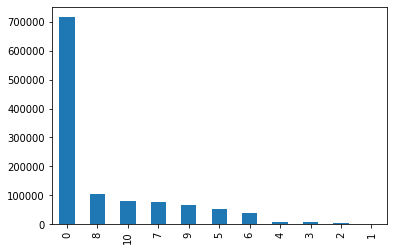

In [8]:
import matplotlib.pyplot as plt
rating.bookRating.value_counts()
rating.bookRating.value_counts().plot(kind='bar')
plt.show()

In [9]:
df = pd.merge(user, rating, on='userID', how='inner')
df.drop(['Location', 'AgeOfUser'], axis=1, inplace=True)
df.head()

,userID,ISBN,bookRating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


**To check Number of null values in the data:**


In [13]:
print(df.info())
print()
print("NULL VALUES:")
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 35.1+ MB
None

NULL VALUES:

userID        0
ISBN          0
bookRating    0
dtype: int64


In [14]:
data = df.iloc[::200000, :]
data.head()

,userID,ISBN,bookRating
0,2,0195153448,0
200000,48494,0871233428,0
400000,98391,0670032549,10
600000,147513,0470832525,5
800000,196502,0590431862,0


**From surprise package, import reader and Dataset to load dataset from the pandas dataframe.To reduce the dimensionality of the dataset, we will filter out rarely rated movies and rarely rating users.**

In [17]:
min_book_ratings = 50
filter_books = df['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['ISBN'].isin(filter_books)) & (df['userID'].isin(filter_users))]

print('The original dataframe shape was:\t{}'.format(df.shape))
print('The new dataframe shape is:\t{}'.format(df_new.shape))

The original dataframe shape was:	(1149780, 3)
The new dataframe shape is:	(140516, 3)


 **The load_from_df() method is used to load a dataset from a pandas dataframe. We will also need a Reader object, but only the rating_scale parameter must be specified. The data frame must have three columns, corresponding to the user ids, the item ids, and the ratings in this order. Each row thus corresponds to a given rating.**
 
 **Both Dataset and Reader are imported from Surprise package.**

In [18]:
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df_new[['userID', 'ISBN', 'bookRating']], reader)


**Next, we use the train_test_split() method to sample a trainset and a testset with given sizes. Here we split dataset in train and test set in a ratio of 75:25.**

In [19]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

### B. MODELING AND COMPARISON USING DIFFERENT RECOMMENDATION SYSTEM ALGORITHMS

**Then we will find accuracy for various given algorithms such as:
NormalPredictor, BaselineOnly, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD,SVDpp,NMF, Slope One,Co-clustering etc.**

**We will use the fit() method which will train the algorithm on the trainset, and the test() method to return the predictions made from the testset. We use “rmse” as our accuracy metric for the predictions.**

In [20]:
from surprise import accuracy
from surprise.accuracy import rmse

def findAccuracy(algorithm):
    algo = algorithm
    algo.fit(trainset)
    prediction = algo.test(testset)
    trainset1 = algo.trainset
    acc = accuracy.rmse(prediction)
    return acc,prediction,trainset1

In [21]:
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.model_selection import cross_validate


In [26]:
svd_accuracy, pd1, ts1 = findAccuracy(SVD())
print("SVD ACCURACY ",svd_accuracy )
print()

svdpp_accuracy, pd2 , ts2 = findAccuracy(SVDpp())
print("SVDpp ACCURACY ",svdpp_accuracy )
print()

SlopeOne_accuracy, pd3, ts3 = findAccuracy(SlopeOne())
print("SlopeOne ACCURACY ",SlopeOne_accuracy )
print()

NMF_accuracy, pd4, ts4 = findAccuracy( NMF())
print("NMF ACCURACY ",NMF_accuracy )
print()

NormalPredictor_accuracy , pd5, ts5 = findAccuracy( NormalPredictor())
print("NormalPredictor ACCURACY ",NormalPredictor_accuracy )
print()

KNNBaseline_accuracy , pd6, ts6 = findAccuracy(KNNBaseline())
print("KNNBaseline ACCURACY ",KNNBaseline_accuracy )
print()

KNNBasic_accuracy,pd7 ,ts7  = findAccuracy(KNNBasic())
print("KNNBasic ACCURACY ",KNNBasic_accuracy )
print()

KNNWithMeans_accuracy, pd8 , ts8 = findAccuracy(KNNWithMeans())
print("KNNWithMeans ACCURACY ",KNNWithMeans_accuracy )
print()

KNNWithZScore_accuracy, pd9, ts9 = findAccuracy(KNNWithZScore())
print("KNNWithZScore ACCURACY ",KNNWithZScore_accuracy )
print()

BaselineOnly_accuracy, pd10, ts10 = findAccuracy( BaselineOnly())
print("BaselineOnly ACCURACY ",BaselineOnly_accuracy )
print()

CoClustering_accuracy, pd11 , ts11 = findAccuracy(CoClustering())
print("CoClustering ACCURACY ",CoClustering_accuracy )
print()

RMSE: 3.5895
SVD ACCURACY  3.589529381796575

RMSE: 3.8224
SVDpp ACCURACY  3.8224389840816824

RMSE: 3.4715
SlopeOne ACCURACY  3.471459939080663

RMSE: 3.8177
NMF ACCURACY  3.8176759755587972

RMSE: 4.6807
NormalPredictor ACCURACY  4.680684492676334

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.4928
KNNBaseline ACCURACY  3.492774361070563

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.7197
KNNBasic ACCURACY  3.719700100771423

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.4878
KNNWithMeans ACCURACY  3.4877830904621034

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.5050
KNNWithZScore ACCURACY  3.504960690046971

Estimating biases using als...
RMSE: 3.3908
BaselineOnly ACCURACY  3.3907674536041257

RMSE: 3.4797
CoClustering ACCURACY  3.4797142422717773



In [31]:
# BEST RMSE FOR BASELINE ALGORITHM
acc, pred, trainset1 = findAccuracy( BaselineOnly())

print("BaselineOnly ACCURACY:" ,acc)


Estimating biases using als...
RMSE: 3.3908
BaselineOnly ACCURACY: 3.3907674536041257


Baseline only has the best RMSE score amongst all of the above algorithms.To inspect our predictions in details, we are going to build a pandas data frame with all the predictions.

In [50]:
#Returns the number of items rated by the user
def get_item_numbers(uid):
    try:
        return len(trainset1.ur[trainset1.to_inner_uid(uid)])
    except ValueError: 
        return 0
    
#Returns the number of users that have rated the items    
def get_user_numbers(iid):
    try: 
        return len(trainset1.ir[trainset1.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(pred, columns=['userid', 'isbn_id', 'rui', 'est', 'details'])
df['Item_numbers'] = df.userid.apply( get_item_numbers)
df['User_numbers'] = df.isbn_id.apply(get_user_numbers)
df['error'] = abs(df.est - df.rui)

In [51]:
df.head()

,userid,isbn_id,rui,est,details,Item_numbers,User_numbers,error
0,231210,0441569595,0.0,0.804308,{'was_impossible': False},219,61,0.804308
1,44845,0440224772,0.0,1.138440,{'was_impossible': False},40,35,1.138440
2,7210,0140077022,8.0,2.839870,{'was_impossible': False},11,17,5.160130
3,201760,0451172817,7.0,2.890307,{'was_impossible': False},8,81,4.109693
4,144531,0440170796,0.0,1.136492,{'was_impossible': False},148,34,1.136492


In [52]:
best_predictions = df.sort_values(by='error')[:10]
worst_predictions = df.sort_values(by='error')[-10:]

In [53]:
best_predictions

,userid,isbn_id,rui,est,details,Item_numbers,User_numbers,error
22699,87746,0375705198,0.0,0.0,{'was_impossible': False},163,43,0.0
31160,39646,0786866586,0.0,0.0,{'was_impossible': False},151,41,0.0
720,145431,0425167720,0.0,0.0,{'was_impossible': False},56,36,0.0
22865,87746,0440222656,0.0,0.0,{'was_impossible': False},163,178,0.0
2189,155147,0971880107,0.0,0.0,{'was_impossible': False},80,630,0.0
14417,98741,080411868X,0.0,0.0,{'was_impossible': False},231,101,0.0
14382,275970,0061093327,0.0,0.0,{'was_impossible': False},114,27,0.0
31135,242824,0671014919,0.0,0.0,{'was_impossible': False},107,44,0.0
26770,203968,0425147517,0.0,0.0,{'was_impossible': False},92,53,0.0
8285,224435,0312973055,0.0,0.0,{'was_impossible': False},63,24,0.0


In [54]:
worst_predictions

,userid,isbn_id,rui,est,details,Item_numbers,User_numbers,error
2424,14521,0553269631,10.0,0.151151,{'was_impossible': False},184,24,9.848849
803,11601,0375703063,10.0,0.096445,{'was_impossible': False},185,65,9.903555
32476,73394,0345387651,10.0,0.080058,{'was_impossible': False},240,113,9.919942
23426,238781,0446364495,10.0,0.074015,{'was_impossible': False},183,25,9.925985
24405,26544,0515128600,10.0,0.024918,{'was_impossible': False},185,34,9.975082
15969,238781,0345443284,10.0,0.000000,{'was_impossible': False},183,152,10.000000
15763,200674,0425141233,10.0,0.000000,{'was_impossible': False},147,35,10.000000
1107,227447,055356773X,10.0,0.000000,{'was_impossible': False},290,51,10.000000
8463,201017,1401088945,10.0,0.000000,{'was_impossible': False},55,52,10.000000
19040,195694,0345422384,10.0,0.000000,{'was_impossible': False},157,35,10.000000


**We can observe that these predictions are very wrong as for example userid 195694 rated 10 for "0345422384" ISBN but the Baseline Algorithm predicts a 0.**

In [55]:
df_new.loc[df_new['ISBN'] == '0345422384']['bookRating'].describe()


count    57.000000
mean      2.228070
std       3.560786
min       0.000000
25%       0.000000
50%       0.000000
75%       6.000000
max      10.000000
Name: bookRating, dtype: float64

<IPython.core.display.Javascript object>


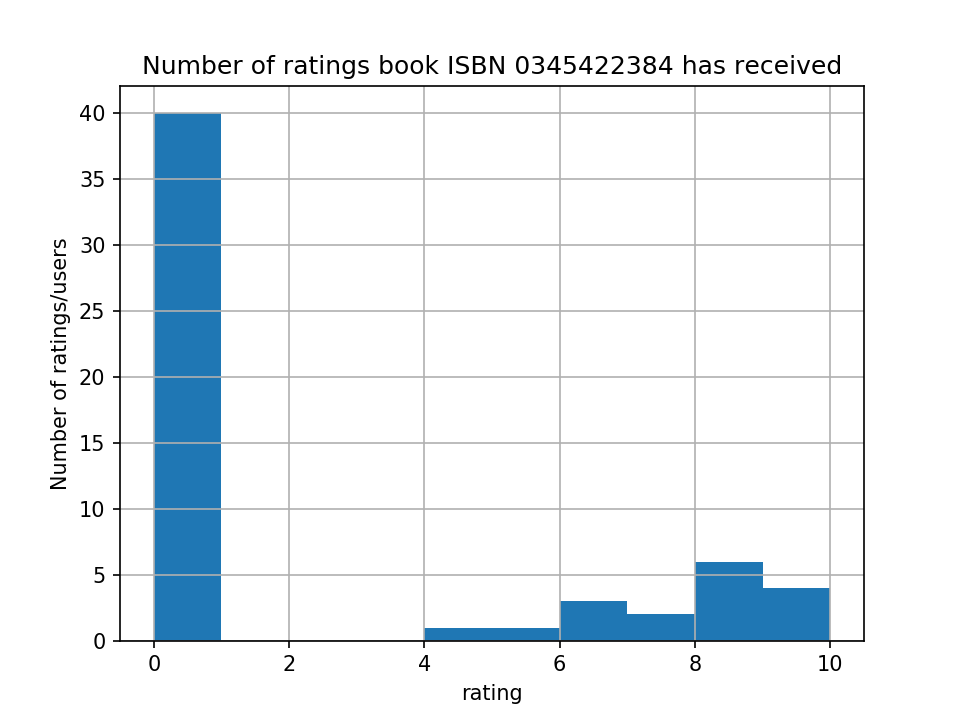

In [56]:
import matplotlib.pyplot as plt
%matplotlib notebook

df_new.loc[df_new['ISBN'] == '0345422384']['bookRating'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings/users')
plt.title('Number of ratings book ISBN 0345422384 has received')
plt.show();

**Graphical representation of the rating distributions shows that for the ISBN '0345422384', maximum number of users rated 0 for the book and very few rated the predicted 10 .**

### C. TUNE ALGORITHM PARAMETERS WITH GridSearchCV

**GridSearchCV class is used to determine the combination of parameters that yields the best score results. Given a dict of parameters, this class exhaustively tries all the combinations of parameters and reports the best parameters for any accuracy measure (averaged over the different splits). It is heavily inspired from scikit-learn’s GridSearchCV.**

**Following is an example where we set different values for parameters n_epochs, lr_all and reg_all of the SVD algorithm.
Here we are evaluating the average RMSE, MAE and FCP over a 4-fold cross-validation procedure, but any cross-validation iterator can used.**

In [57]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

# Use movielens-100K
data = Dataset.load_builtin('ml-100k')
# Define the grid of parameters that need to be optimized
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae', 'fcp'], cv=4)

grid_search.fit(data)

# best RMSE score
print("RMSE BEST SCORE")
print(grid_search.best_score['rmse'])
print()
print("RMSE BEST SCORE PARAMETERS")
# combination of parameters that gave the best RMSE score
print(grid_search.best_params['rmse'])
print()
# best MAE score
print("MAE BEST SCORE")
print(grid_search.best_score['mae'])
print()
print("MAE BEST SCORE PARAMETERS")
# combination of parameters that gave the best MAE score
print(grid_search.best_params['mae'])
print()
# best FCP score
print("FCP BEST SCORE")
print(grid_search.best_score['fcp'])
print()
print("FCP BEST SCORE PARAMETERS")
# combination of parameters that gave the best MAE score
print(grid_search.best_params['fcp'])

RMSE BEST SCORE
0.9617449416749201

RMSE BEST SCORE PARAMETERS
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}

MAE BEST SCORE
0.7707477629483255

MAE BEST SCORE PARAMETERS
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}

FCP BEST SCORE
0.6971066515425577

FCP BEST SCORE PARAMETERS
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.6}


**For further analysis, the cv_results attribute has all the needed information:**

In [58]:
print(grid_search.cv_results)

{'split0_test_rmse': array([0.99016637, 0.99643698, 0.96917404, 0.97784851, 0.97307086,
       0.98113405, 0.96025048, 0.97000752]), 'split1_test_rmse': array([0.9955034 , 1.00189278, 0.97254546, 0.9819538 , 0.97725247,
       0.98603668, 0.96316691, 0.97351468]), 'split2_test_rmse': array([0.99011981, 0.99643287, 0.96828675, 0.97700262, 0.9722365 ,
       0.98044536, 0.95892537, 0.96884705]), 'split3_test_rmse': array([0.99577088, 1.0018279 , 0.97385535, 0.98301584, 0.9779685 ,
       0.98642762, 0.96463701, 0.97475874]), 'mean_test_rmse': array([0.99289012, 0.99914763, 0.9709654 , 0.97995519, 0.97513209,
       0.98351093, 0.96174494, 0.971782  ]), 'std_test_rmse': array([0.0027487 , 0.00271281, 0.00230394, 0.00257477, 0.0025087 ,
       0.00273559, 0.00226768, 0.00243032]), 'rank_test_rmse': array([7, 8, 2, 5, 4, 6, 1, 3], dtype=int64), 'split0_test_mae': array([0.79797176, 0.80713704, 0.77718567, 0.78804209, 0.78067398,
       0.79124095, 0.76859331, 0.78042976]), 'split1_test_mae'

**They can be imported into a pandas dataframe for further analysis**

In [59]:
results = pd.DataFrame.from_dict(grid_search.cv_results)
print(results)

   split0_test_rmse  split1_test_rmse  split2_test_rmse  split3_test_rmse  \
0          0.990166          0.995503          0.990120          0.995771   
1          0.996437          1.001893          0.996433          1.001828   
2          0.969174          0.972545          0.968287          0.973855   
3          0.977849          0.981954          0.977003          0.983016   
4          0.973071          0.977252          0.972237          0.977969   
5          0.981134          0.986037          0.980445          0.986428   
6          0.960250          0.963167          0.958925          0.964637   
7          0.970008          0.973515          0.968847          0.974759   

   mean_test_rmse  std_test_rmse  rank_test_rmse  split0_test_mae  \
0        0.992890       0.002749               7         0.797972   
1        0.999148       0.002713               8         0.807137   
2        0.970965       0.002304               2         0.777186   
3        0.979955       0.0025

### D. COMMAND LINE USAGE

**Surprise can also be used from the command line, for example:**

surprise -algo SVD -params "{'n_epochs': 6, 'verbose': True}" -load-builtin ml-100k -n-folds 4

### E.  SUMMARY

Here I provide a brief summary of the key steps that were followed in the examples above to build a recommendation engine for the downloaded dataset using Surprise Package.
1. Install Scikit Surprise and Pandas package.
2. Import necessary packages.
3. Import all files to explore data.
4. Use Reader class to parse the file correctly for Surprise package to read and process the file.
5. Find accuracy of various inbuilt algorithms.
6. Make predictions of Ratings for a given trainset.
7. Optimize hyperparameters using Gridsearch.
8. Find the best parameters and the best score with the optimized hyperparameters.

## CONCLUSION

With enough data, collaborative filtering provides a powerful way for data scientists to recommend new products or items to users. Surprise is a Python scikit building and analyzing recommender systems that deal with explicit rating data.

From the above examples, we can see how the Python package surprise can be used to predict unknown user ratings using collaborative filtering approach on a book-ratings dataset, fit high performing recommender systems, generate predictions for users, and how can we tune our system for maximum performance. We can also perform Cross-validation and heavy hyperparameters tuning with surprise to get more accurate predictions.

Further use-case examples can be referred from : https://surprise.readthedocs.io/en/stable/FAQ.html

## REFERENCES

1. http://surpriselib.com/
2. https://surprise.readthedocs.io/en/stable/
3. https://en.wikipedia.org/wiki/Recommender_system
4. https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b
5. https://realpython.com/build-recommendation-engine-collaborative-filtering/
6. https://medium.com/hacktive-devs/recommender-system-made-easy-with-scikit-surprise-569cbb689824